# Billboard EDA II

I didn't use any of this for presenting. I'll revisit this. 


# Packages, Loading and Cleaning Initial DF (billboard_df)

In [1]:
# Billboard EDA II

# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import statsmodels.api as sm


%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [3]:
# converting WeekID to datetime
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
# renaming columns to python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [5]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [6]:
# replacing artist names: pre string-split

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 

In [7]:
# String Split
new = billboard_df["performer"].str.split(" Featuring ", n = 1, expand = True) 
billboard_df["main_performer"]= new[0] 
billboard_df["featured_performer"]= new[1] 

In [8]:
# Post-String Split replacements of artist names
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Janet Jackson", "Janet")
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Jay Z", "Jay-Z")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Janet Jackson", "Janet")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Jay Z", "Jay-Z")
# Frankie Valli and the 4 Seasons
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Frankie Valli", "The 4 Seasons")

In [9]:
billboard_df.dtypes

url                           object
week_id               datetime64[ns]
week_position                  int64
song                          object
performer                     object
song_id                       object
instance                       int64
prev_week_position           float64
peak_position                  int64
weeks_on_chart                 int64
date                          object
month                          int64
day                            int64
year                           int64
main_performer                object
featured_performer            object
dtype: object

In [10]:
billboard_df.year.describe()

count    317795.000000
mean       1988.528281
std          17.586684
min        1958.000000
25%        1973.000000
50%        1989.000000
75%        2004.000000
max        2019.000000
Name: year, dtype: float64

In [11]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [12]:
billboard_df['week_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1)

# Note: This is the end of cleaning initial DF

In [13]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,week_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None,26
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None,48
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None,58
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None,64
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None,74


In [14]:
song_id_groupby = billboard_df.groupby('song_id')

In [15]:
unique_df = billboard_df.groupby('year').nunique()

In [16]:
unique_df.head(100)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,week_points
year,,,,,,,,,,,,,,,,
1958,22,100,338,220,352,2,100,100,22,22,5,18,1,220,0,100
1959,52,100,641,351,663,3,100,100,26,52,12,31,1,351,0,100
1960,53,100,668,334,700,3,100,100,27,53,12,31,1,331,5,100
1961,52,100,747,399,779,4,100,100,26,52,12,30,1,398,3,100
1962,52,100,748,382,768,5,100,100,40,52,12,31,1,381,2,100
1963,52,100,739,389,754,4,100,100,23,52,12,31,1,387,3,100
1964,52,100,786,376,811,3,100,100,23,52,12,31,1,375,3,100
1965,52,100,773,379,800,2,100,100,25,52,12,31,1,376,5,100
1966,53,100,803,412,832,2,100,100,30,53,12,31,1,410,4,100


In [17]:
unique_df = unique_df.drop("year", axis=1).reset_index()

In [18]:
unique_df = unique_df.drop(columns=['week_id','instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day', 'week_points'])

In [19]:
unique_df.head(100)

,year,week_position,song,performer,song_id,main_performer,featured_performer
0,1958,100,338,220,352,220,0
1,1959,100,641,351,663,351,0
2,1960,100,668,334,700,331,5
3,1961,100,747,399,779,398,3
4,1962,100,748,382,768,381,2
5,1963,100,739,389,754,387,3
6,1964,100,786,376,811,375,3
7,1965,100,773,379,800,376,5
8,1966,100,803,412,832,410,4
9,1967,100,802,404,827,402,5


In [20]:
unique_df['songs_per_main_performer'] = unique_df.apply(lambda row: row.song_id / row.main_performer, axis=1)

# Note: I'm only going to run this analysis for main performers. "Featured_performer" has a lot of nulls, especially in earlier years. 

In [21]:
unique_df.head(100)

,year,week_position,song,performer,song_id,main_performer,featured_performer,songs_per_main_performer
0,1958,100,338,220,352,220,0,1.600000
1,1959,100,641,351,663,351,0,1.888889
2,1960,100,668,334,700,331,5,2.114804
3,1961,100,747,399,779,398,3,1.957286
4,1962,100,748,382,768,381,2,2.015748
5,1963,100,739,389,754,387,3,1.948320
6,1964,100,786,376,811,375,3,2.162667
7,1965,100,773,379,800,376,5,2.127660
8,1966,100,803,412,832,410,4,2.029268
9,1967,100,802,404,827,402,5,2.057214


In [27]:
unique_df.songs_per_main_performer.describe()

count    62.000000
mean      1.719549
std       0.255619
min       1.290960
25%       1.547444
50%       1.620215
75%       1.941089
max       2.355212
Name: songs_per_main_performer, dtype: float64

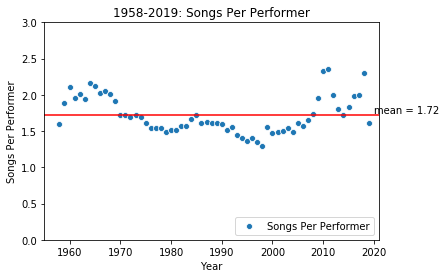

In [38]:
# Songs per artist per year

ax = sns.scatterplot(x="year", y = "songs_per_main_performer", data=unique_df, label='Songs Per Performer')
plt.xlim(1955, 2021)
plt.ylim(0, 3)
plt.hlines(y=1.72, xmin = 1955, xmax = 2025, color = 'red')
plt.annotate(s = 'mean = 1.72', xy = (2020, 1.75))
plt.xlabel('Year')

plt.ylabel('Songs Per Performer')
plt.title('1958-2019: Songs Per Performer')
plt.legend(loc='lower right')

In [23]:
unique_df.songs_per_main_performer.describe()

count    62.000000
mean      1.719549
std       0.255619
min       1.290960
25%       1.547444
50%       1.620215
75%       1.941089
max       2.355212
Name: songs_per_main_performer, dtype: float64

In [39]:
X = unique_df["year"] ## X usually means our input variables (or independent variables)
y = unique_df["songs_per_main_performer"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     songs_per_main_performer   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                 -0.008
Method:                       Least Squares   F-statistic:                    0.5296
Date:                      Wed, 08 Jan 2020   Prob (F-statistic):              0.470
Time:                              10:51:52   Log-Likelihood:                -2.6254
No. Observations:                        62   AIC:                             9.251
Df Residuals:                            60   BIC:                             13.51
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3549      3.621      1.203      0.234      -2.889      11.599
year          -0.0013      0.002     -0.728      0.470      -0.005       0.002
==============================================================================
Omnibus:                        6.992   Durbin-Watson:                   0.362
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                6.918
Skew:                           0.818   Prob(JB):                       0.0315
Kurtosis:                       2.996   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0, 1000)

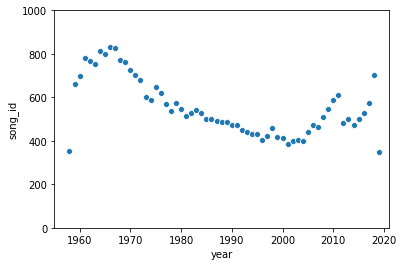

In [48]:
# Unique songs per year

ax = sns.scatterplot(x="year", y = "song_id", data=unique_df)
plt.xlim(1955, 2021)
plt.ylim(0, 1000)

In [41]:
X = unique_df["year"] ## X usually means our input variables (or independent variables)
y = unique_df["song_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                song_id   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     39.60
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.97e-08
Time:                        10:51:52   Log-Likelihood:                -374.35
No. Observations:                  62   AIC:                             752.7
Df Residuals:                      60   BIC:                             757.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9706.1809   1454.514      6.673      0.000    6796.720    1.26e+04
year          -4.6026      0.731     -6.293      0.000      -6.066      -3.140
==============================================================================
Omnibus:                        3.258   Durbin-Watson:                   0.490
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                3.054
Skew:                           0.074   Prob(JB):                        0.217
Kurtosis:                       4.077   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(0, 500)

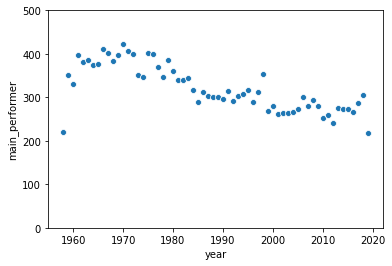

In [50]:
# Unique Performers per year

ax = sns.scatterplot(x="year", y = "main_performer", data=unique_df)
plt.ylim(0,500)

In [43]:
X = unique_df["year"] ## X usually means our input variables (or independent variables)
y = unique_df["main_performer"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         main_performer   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     83.46
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           5.84e-13
Time:                        10:51:52   Log-Likelihood:                -306.55
No. Observations:                  62   AIC:                             617.1
Df Residuals:                      60   BIC:                             621.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4772.8638    487.295      9.795      0.000    3798.128    5747.600
year          -2.2387      0.245     -9.136      0.000      -2.729      -1.749
==============================================================================
Omnibus:                       40.992   Durbin-Watson:                   0.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.045
Skew:                          -1.714   Prob(JB):                     1.20e-42
Kurtosis:                      10.936   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'By Year: Unique Performers vs Unique Songs')

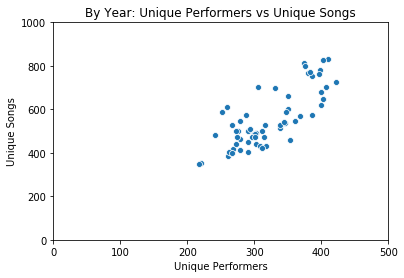

In [55]:
ax = sns.scatterplot(x="main_performer", y = "song_id", data=unique_df)
plt.xlim(0,500)
plt.ylim(0,1000)
plt.xlabel('Unique Performers')

plt.ylabel('Unique Songs')
plt.title('By Year: Unique Performers vs Unique Songs')

In [45]:
X = unique_df["main_performer"] ## X usually means our input variables (or independent variables)
y = unique_df["song_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                song_id   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     99.70
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           2.26e-14
Time:                        10:51:52   Log-Likelihood:                -359.71
No. Observations:                  62   AIC:                             723.4
Df Residuals:                      60   BIC:                             727.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -77.2858     64.054     -1.207      0.232    -205.413      50.842
main_performer     1.9650      0.197      9.985      0.000       1.571       2.359
==============================================================================
Omnibus:                        3.906   Durbin-Watson:                   0.344
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                3.759
Skew:                           0.553   Prob(JB):                        0.153
Kurtosis:                       2.518   Cond. No.                     2.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
unique_main_performers_df = billboard_df.groupby('main_performer').nunique()

In [56]:
unique_main_performers_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer,week_points
main_performer,,,,,,,,,,,,,,,,
"""Groove"" Holmes",14,13,2,1,2,1,11,11,11,14,5,14,1,1,0,13
"""Little"" Jimmy Dickens",10,10,1,1,1,1,9,8,10,10,3,10,1,1,0,10
"""Pookie"" Hudson",1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1
"""Weird Al"" Yankovic",84,59,11,1,11,1,55,29,20,84,11,31,9,1,0,59
'N Sync,172,68,10,2,10,1,64,43,26,172,12,30,5,1,1,68


In [47]:
unique_main_performers_df.sort_values(by='weeks_per_song', ascending=False)

KeyError: 'weeks_per_song'

In [ ]:
unique_main_performers_df.head(50)

In [ ]:
X = unique_main_performers_df["song_id"] ## X usually means our input variables (or independent variables)
y = unique_main_performers_df["week_id"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

In [ ]:
unique_main_performers_df.year.describe()

In [ ]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="song_id", y = "week_id", data=unique_main_performers_df)
plt.title('Distinct Songs vs Distinct Weeks on Chart, Per Main Performer')
plt.xlabel('Count of Distinct Songs')
plt.ylabel('Count of Distinct Weeks')

In [ ]:
unique_main_performers_df = unique_main_performers_df.sort_values(by=['song_id'], ascending=False)

In [ ]:
unique_main_performers_df.head(200)

In [ ]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="song_id", y = "year", data=unique_main_performers_df)
plt.title('Distinct Songs vs Distinct Years on Chart, Per Main Performer')
plt.xlabel('Count of Distinct Songs')
plt.ylabel('Count of Distinct Years')

In [ ]:
X = unique_main_performers_df["song_id"] ## X usually means our input variables (or independent variables)
y = unique_main_performers_df["year"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

In [ ]:
unique_main_performers_df['weeks_per_song'] = unique_main_performers_df.apply(lambda row: row.week_id / row.song_id, axis=1)

In [ ]:
unique_main_performers_df = unique_main_performers_df.sort_values(by=['weeks_per_song'], ascending=False)

In [ ]:
unique_main_performers_df.head()

In [ ]:
unique_main_performers_df.weeks_per_song.describe()

# Note: the unique songs vs weeks-per-song is going to end up in the appendix. I already tell this story with the previous graphs. 

In [ ]:
# upper bound outliers: everything where "weeks per song" > 30

In [ ]:
ax = sns.scatterplot(x="weeks_per_song", y = "song_id", data=unique_main_performers_df)

In [ ]:
sns.set(style="darkgrid")
ax = sns.scatterplot(x="song_id", y = "weeks_per_song", data=unique_main_performers_df)
plt.title('Distinct Songs vs Weeks Per Song, Per Main Performer')
plt.xlabel('Count of Distinct Songs')
plt.ylabel('Unique Weeks per Unique Song')

In [ ]:
X = unique_main_performers_df["song_id"] ## X usually means our input variables (or independent variables)
y = unique_main_performers_df["weeks_per_song"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)
# Print out the statistics
model.summary()

In [ ]:
# plotting distribution of "total weeks" in "performer value counts"

ax = sns.boxplot(x="weeks_per_song", data=unique_main_performers_df)

In [ ]:
unique_main_performers_df = unique_main_performers_df.sort_values(by=['weeks_per_song'], ascending=False)

In [ ]:
list(unique_main_performers_df.columns.values)

In [ ]:
unique_main_performers_df = unique_main_performers_df[['weeks_per_song', 'week_id',
 'week_position',
 'song',
 'performer',
 'song_id',
 'instance',
 'prev_week_position',
 'peak_position',
 'weeks_on_chart',
 'date',
 'month',
 'day',
 'year',
 'week_points']]

In [ ]:
unique_main_performers_df.head(5)

In [ ]:
unique_main_performers_df.loc[unique_main_performers_df['year'].idxmax()]

In [ ]:
unique_main_performers_df.head(500)

In [ ]:
unique_main_performers_df = unique_main_performers_df.sort_values(by=['weeks_per_song'], ascending=True)

In [ ]:
instance_groupby = billboard_df.groupby('instance').sum()

In [ ]:
instance_groupby.head(10)

In [ ]:
total = instance_groupby['week_points'].sum()
print (total)

In [ ]:
instance_groupby['percentage_week_points'] = instance_groupby.apply(lambda row: row.week_points/total, axis=1)

In [ ]:
weeks_total = instance_groupby['weeks_on_chart'].sum()
print (weeks_total)

In [ ]:
instance_groupby['percentage_weeks_on_chart'] = instance_groupby.apply(lambda row: row.weeks_on_chart/weeks_total, axis=1)

In [ ]:
instance_groupby.head(10)

# So in total, songs on their "first instance" account for 95% of the week_points and 91% of the weeks on chart. Not sure if I need to cross this bridge yet, but it could be ok if I only considered songs on their first run. 

## This is the end of this notebook.